THIS PARTICULAR NOTEBOOK CONTAINS PREDICTION RESULTS OF COMBO - IC50 VALUES USING GRADIENT BOOSTING ALGORITHM, TEST AND VALIDATION SETS WERE USED TO VALIDATE THE RESULTS. DATA SET USED WAS EXTENSIVELY PROCESSED FOR SKEWNESS AND KURTOSIS TOO...

In [4]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\combo_IC50_skew_kurt_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.
valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_14.csv')

In [5]:
concatenated_df.columns.tolist()

['Cell Line name',
 'SDIM',
 'Tissue',
 'Cancer Type',
 'Anchor Name',
 'Anchor Target',
 'Anchor Pathway',
 'Anchor Conc',
 'Library Name',
 'library Target',
 ' Library Pathway',
 'Maxc',
 'Library IC50',
 'Library Emax',
 'Bliss Emax',
 'Combo Emax',
 'Delta Xmid',
 'Delta Emax',
 'Synergy?',
 'ATS1p_x',
 'apol_x',
 'Sp_x',
 'ATS0v_x',
 'ZMIC0_x',
 'ATS1v_x',
 'Sv_x',
 'ATSC0v',
 'McGowan_Volume_x',
 'CrippenMR',
 'ATS2p_x',
 'nBonds2',
 'nHeavyAtom_x',
 'ATS2v_x',
 'ATS3p_x',
 'WTPT-1_x',
 'VR3_D',
 'ATS1i',
 'nAtom',
 'Spe',
 'Sare',
 'ATS3v_x',
 'Si',
 'nBonds',
 'nC',
 'nBondsS3',
 'ATS0p',
 'TIC1',
 'ATS4p',
 'ATS0i',
 'Zagreb_x',
 'TIC4',
 'TIC5',
 'nBondsS',
 'nBondsS2',
 'TIC3',
 'ATS2e',
 'AMR_x',
 'TIC2',
 'MPC2',
 'ATSC1m_x',
 'AATSC0v',
 'PetitjeanNumber',
 'AATS4i',
 'AATS4e',
 'AATS3e',
 'AATS3i',
 'VE1_Dt',
 'SIC3',
 'SIC4',
 'AATSC0p',
 'SIC5',
 'AATSC1m_x',
 'BIC3',
 'AATSC2c_x',
 'topoShape_x',
 'topoRadius_x',
 'WPATH_x',
 'SpAD_D_x',
 'SpMax_D_x',
 'SpDiam_D_x',


In [6]:
concatenated_df

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1,Combo IC50
0,-0.594742,-0.594742,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-0.255221,-0.158462,...,-0.769550,-0.499326,-0.555155,0.264339,-0.473616,-0.447850,-0.070525,-0.613131,-0.826328,12.690692
1,-0.683066,-0.683066,0.0,0.0,0.778971,0.778971,0.745955,-1.303838,0.662210,0.772391,...,-0.206117,0.054180,-0.658952,-0.864448,-0.426859,-0.247622,0.269824,-0.910423,-0.109546,15.350248
2,1.083119,1.083119,0.0,0.0,-1.403398,-1.403398,-0.796785,0.759422,-0.544596,-0.468959,...,-0.415908,0.547891,-1.658487,0.263687,-1.071368,-1.231359,-2.329312,-1.258447,-1.017625,10.710601
3,0.615130,0.615130,0.0,0.0,0.362013,0.362013,0.210389,0.038221,0.807659,0.878693,...,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116,8.545300
4,1.126420,1.126420,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,-1.177607,-1.148174,...,0.370918,0.127499,-0.161969,-1.216652,-0.590462,-0.288751,-0.044123,-0.598535,-0.338686,8.351068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143607,-1.373184,-1.373184,0.0,0.0,-0.411232,-0.411232,0.210389,-0.805546,-0.972988,-0.928620,...,-0.641391,0.717184,-1.227046,-0.240562,-0.819111,-0.723829,-1.674816,-1.103345,-0.707052,14.614905
143608,-0.982697,-0.982697,0.0,0.0,0.129245,0.129245,0.210389,0.038221,1.295998,1.323176,...,0.121220,0.738434,0.587082,1.548027,0.878676,0.867161,0.522169,0.940913,0.268076,10.885169
143609,0.994817,0.994817,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-2.128216,-2.168169,...,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047,5.535373
143610,1.415486,1.415486,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,0.404717,0.491596,...,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521,13.208833


for the first attempt with the 90 % threshold limit for filtering columns as per dimentionality reduction and merging the reduced padel descriptors with original breast cancer combination data, making the transformations to reduce kurtosis and skewness (only for indepoendent variables) and  taking combo IC50 as a dependent variables, a regressin prediction is being done based on GRADIENT BOOSTING ALGORITHM.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [9]:
X = concatenated_df.drop('Combo IC50', axis = 1)
X

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,TDB2m.1,TDB3i.1_y,GRAVH-3,TDB2m.2,TDB7e,TDB5v.1,TDB3v_y,TDB4e.1,TDB5m.2_y,TDB4p.1
0,-0.594742,-0.594742,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-0.255221,-0.158462,...,-0.555155,-0.769550,-0.499326,-0.555155,0.264339,-0.473616,-0.447850,-0.070525,-0.613131,-0.826328
1,-0.683066,-0.683066,0.0,0.0,0.778971,0.778971,0.745955,-1.303838,0.662210,0.772391,...,-0.658952,-0.206117,0.054180,-0.658952,-0.864448,-0.426859,-0.247622,0.269824,-0.910423,-0.109546
2,1.083119,1.083119,0.0,0.0,-1.403398,-1.403398,-0.796785,0.759422,-0.544596,-0.468959,...,-1.658487,-0.415908,0.547891,-1.658487,0.263687,-1.071368,-1.231359,-2.329312,-1.258447,-1.017625
3,0.615130,0.615130,0.0,0.0,0.362013,0.362013,0.210389,0.038221,0.807659,0.878693,...,0.229506,-1.042620,-0.606483,0.229506,1.814737,0.608203,1.112921,0.820116,0.107493,0.405116
4,1.126420,1.126420,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,-1.177607,-1.148174,...,-0.161969,0.370918,0.127499,-0.161969,-1.216652,-0.590462,-0.288751,-0.044123,-0.598535,-0.338686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143607,-1.373184,-1.373184,0.0,0.0,-0.411232,-0.411232,0.210389,-0.805546,-0.972988,-0.928620,...,-1.227046,-0.641391,0.717184,-1.227046,-0.240562,-0.819111,-0.723829,-1.674816,-1.103345,-0.707052
143608,-0.982697,-0.982697,0.0,0.0,0.129245,0.129245,0.210389,0.038221,1.295998,1.323176,...,0.587082,0.121220,0.738434,0.587082,1.548027,0.878676,0.867161,0.522169,0.940913,0.268076
143609,0.994817,0.994817,0.0,0.0,1.149135,1.149135,1.053985,0.586058,-2.128216,-2.168169,...,0.339178,0.151173,0.875372,0.339178,0.400854,-0.216762,-0.185623,-0.454183,-0.107921,0.366047
143610,1.415486,1.415486,0.0,0.0,1.320941,1.320941,1.197459,-1.083011,0.404717,0.491596,...,1.350208,2.021868,-2.381152,1.350208,1.347834,-0.603477,0.926332,2.017283,0.056458,-0.875521


In [10]:
Y = concatenated_df['Combo IC50']
Y = pd.DataFrame(Y)
Y

,Combo IC50
0,12.690692
1,15.350248
2,10.710601
3,8.545300
4,8.351068
...,...
143607,14.614905
143608,10.885169
143609,5.535373
143610,13.208833


In [11]:
X_valid = valid_data.drop('Combo IC50', axis = 1)
Y_valid = valid_data['Combo IC50']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 2541)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
# Instantiate Gradient Boosting Regressor with early stopping
model = GradientBoostingRegressor(loss='absolute_error',
                                   learning_rate=0.08,
                                   n_estimators=10000,
                                   max_depth=1,
                                   random_state=6020,
                                   max_features=8)  # Tolerance to declare convergence

SHAP (SHapley Additive exPlanations) is a popular method for explaining individual predictions in machine learning models. It provides a way to understand the impact of different features on model predictions. Here's a brief introduction to SHAP and its role in model training:

### Introduction to SHAP:

SHAP values aim to explain the prediction of an instance by calculating the contribution of each feature to the prediction. These values help in understanding the importance of each feature in the model's output. Positive SHAP values indicate a feature positively contributed to the prediction, while negative SHAP values suggest the feature had a negative impact on the prediction.

### Positive and Negative Scores:

1. Positive SHAP values: These indicate that the corresponding feature has a positive impact on the prediction. Higher positive values suggest a stronger influence on the model's output.

2. Negative SHAP values: These imply that the corresponding feature has a negative effect on the prediction. Higher negative values suggest a stronger adverse impact on the model's output.

### Role in Model Training:

SHAP values play a crucial role in model training and evaluation:

1. Feature Importance Identification: SHAP values help identify which features are most influential in making predictions. They provide insights into how changes in input features affect the model's output, allowing users to prioritize important features for decision-making.

2. Model Interpretability: By using SHAP values, users can interpret the model's predictions and understand the reasons behind specific decisions. This interpretability is crucial for gaining trust in complex machine learning models.

3. Debugging and Improvement: Analyzing SHAP values can help in debugging models, identifying biases, and improving overall model performance by understanding the impact of individual features.

Overall, SHAP-based feature importance identification contributes to better model understanding, interpretability, and the overall transparency of machine learning models, making it an essential tool in the model training and evaluation process.

In [17]:
import shap

In [18]:
# Fit the model to the training data
model.fit(X_train, Y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(model)



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


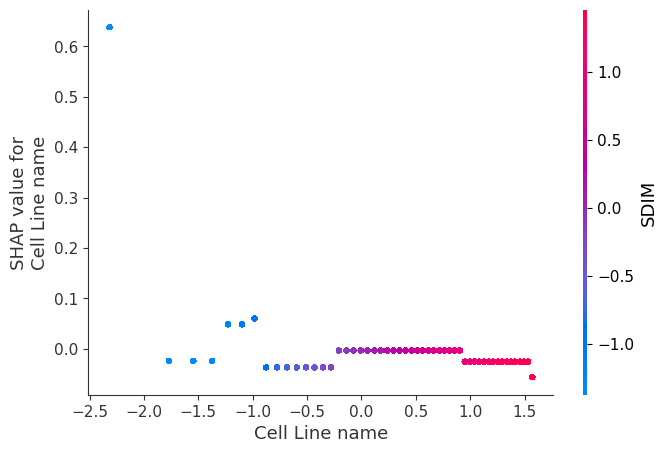

In [22]:
shap_values = explainer.shap_values(X_test)

import shap

# Assuming you have SHAP values for a single feature in 'shap_values'
# You can choose a specific feature index, e.g., 0, if you have multiple features
feature_index = 0

# Create a summary plot for the selected feature
shap.dependence_plot(feature_index, shap_values, X_test)


In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

In [19]:
shap_values

array([-0.02428333, -0.12289961,  0.        , ...,  0.01474524,
       -0.000149  ,  0.0016428 ])

In [ ]:
# Calculate SHAP values for a specific prediction (e.g., the first test sample)
shap_values = explainer.shap_values(X_test.iloc[0])

In [18]:
# Visualize the SHAP values for that prediction using a force plot
shap.initjs()  # Initialize JavaScript visualization (required for force plots)
shap.force_plot(explainer.expected_value[0], shap_values, X_test.iloc[0])

In [23]:
import numpy as np
# Assuming you have already calculated shap_values for a specific prediction

# Calculate the absolute SHAP values for the specific prediction
abs_shap_values = np.abs(shap_values)

# Sort the absolute SHAP values in descending order to identify the top features
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Select the top 20 features and their corresponding SHAP values
top_20_indices = sorted_indices[:20]
top_20_features = X_test.columns[top_20_indices]
top_20_shap_values = shap_values[top_20_indices]

In [24]:
top_20_shap_values

array([ 1.56933062,  0.73255395,  0.42744313,  0.28268812,  0.25349966,
        0.21400673,  0.15514337,  0.13176365, -0.12289961,  0.12162562,
        0.12079558,  0.12059663,  0.11052658, -0.1075233 ,  0.1029823 ,
        0.09495359,  0.08219285,  0.07712309,  0.07605348,  0.06755027])

In [ ]:
# Create a DataFrame with only the top 20 features for the specific prediction
top_20_features_df = X_test.iloc[0][top_20_features]

In [28]:
top_20_features_df

Delta Xmid     -1.805628
Combo Emax      0.936400
Library Emax    0.497584
Bliss Emax      0.541224
Delta Emax     -1.593644
maxsOm          4.573607
maxsOm.3        4.573607
JGI7           -3.298368
SDIM           -1.373184
minsOm.2        4.573607
VR1_D.8        -3.126479
VE3_Dt.1        2.857568
ATS1v_y        -2.961103
Library IC50    0.264838
VR2_Dt.1       -3.305122
MATS2c.1_y      1.597806
ATSC6i.3        0.477250
GATS5s.1_y     -4.623198
VR2_Dt.3       -3.305122
VR2_Dt_y       -3.305122
Name: 87812, dtype: float64

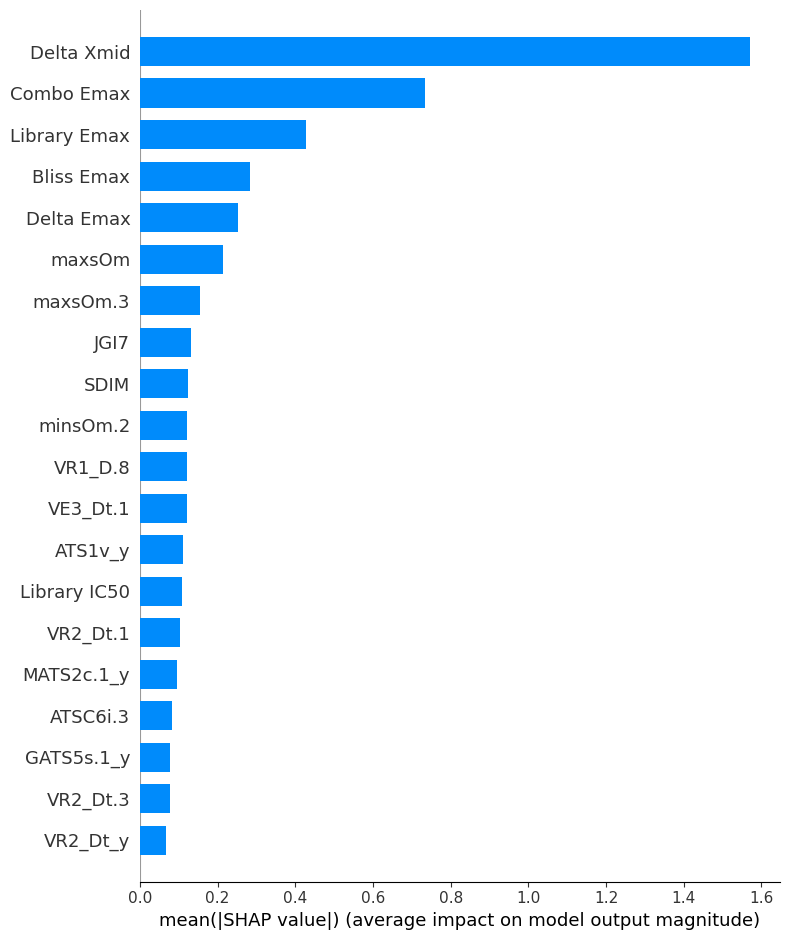

In [36]:
# Convert the top 20 features DataFrame to a matrix-like format
top_20_features_matrix = top_20_features_df.values.reshape(1, -1)

# Visualize the top 20 features and their SHAP values as a bar plot with feature names on the y-axis
shap.summary_plot(top_20_shap_matrix, top_20_features_matrix, plot_type='bar', feature_names=top_20_features)


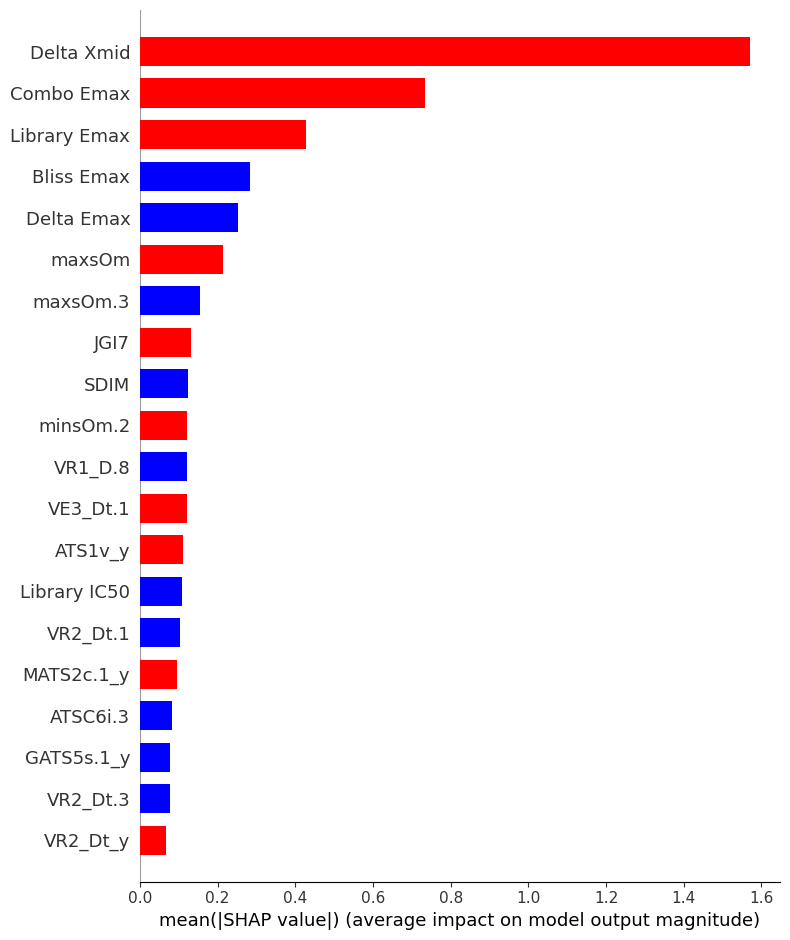

Delta Xmid     -1.805628
Combo Emax      0.936400
Library Emax    0.497584
Bliss Emax      0.541224
Delta Emax     -1.593644
maxsOm          4.573607
maxsOm.3        4.573607
JGI7           -3.298368
SDIM           -1.373184
minsOm.2        4.573607
VR1_D.8        -3.126479
VE3_Dt.1        2.857568
ATS1v_y        -2.961103
Library IC50    0.264838
VR2_Dt.1       -3.305122
MATS2c.1_y      1.597806
ATSC6i.3        0.477250
GATS5s.1_y     -4.623198
VR2_Dt.3       -3.305122
VR2_Dt_y       -3.305122
Name: 87812, dtype: float64

In [83]:

# this is based on the x axis values and not based on the dataframe values -- INCORRECT
# Define colors based on the sign of the values in top_20_features_df (Red for negative, Blue for positive)
colors = ['blue' if val >= 0 else 'red' for val in top_20_features_df]

# Visualize the top 20 features and their SHAP values as a bar plot with custom colors
shap.summary_plot(top_20_shap_matrix, top_20_features_matrix, plot_type='bar', feature_names=top_20_features,
                  title="Top 20 SHAP Values (Blue: Positive, Red: Negative)", color=colors)

# Show the plot
plt.show()
top_20_features_df

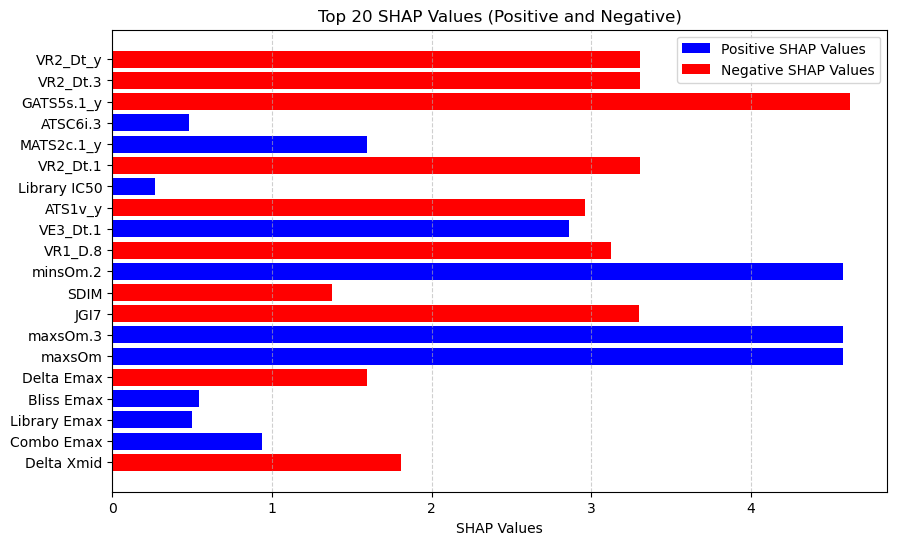

In [84]:
# Separate positive and negative SHAP values
positive_shap_values = [val if val >= 0 else 0 for val in top_20_features_df]
negative_shap_values = [-val if val < 0 else 0 for val in top_20_features_df]

# Create a list of positive and negative features with corresponding SHAP values
positive_features = [feature for feature, val in zip(top_20_features, positive_shap_values)]
negative_features = [feature for feature, val in zip(top_20_features, negative_shap_values)]

# Create a list of positive and negative colors
positive_colors = ['blue'] * len(positive_shap_values)
negative_colors = ['red'] * len(negative_shap_values)

# Create a two-sided bar graph
plt.figure(figsize=(10, 6))
plt.barh(positive_features, positive_shap_values, color=positive_colors, label='Positive SHAP Values')
plt.barh(negative_features, negative_shap_values, color=negative_colors, label='Negative SHAP Values')
plt.xlabel('SHAP Values')
plt.title('Top 20 SHAP Values (Positive and Negative)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [49]:
# Fit the model to the training data
model.fit(X_train, Y_train)

# Initialize the SHAP explainer
explainer = shap.Explainer(model)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


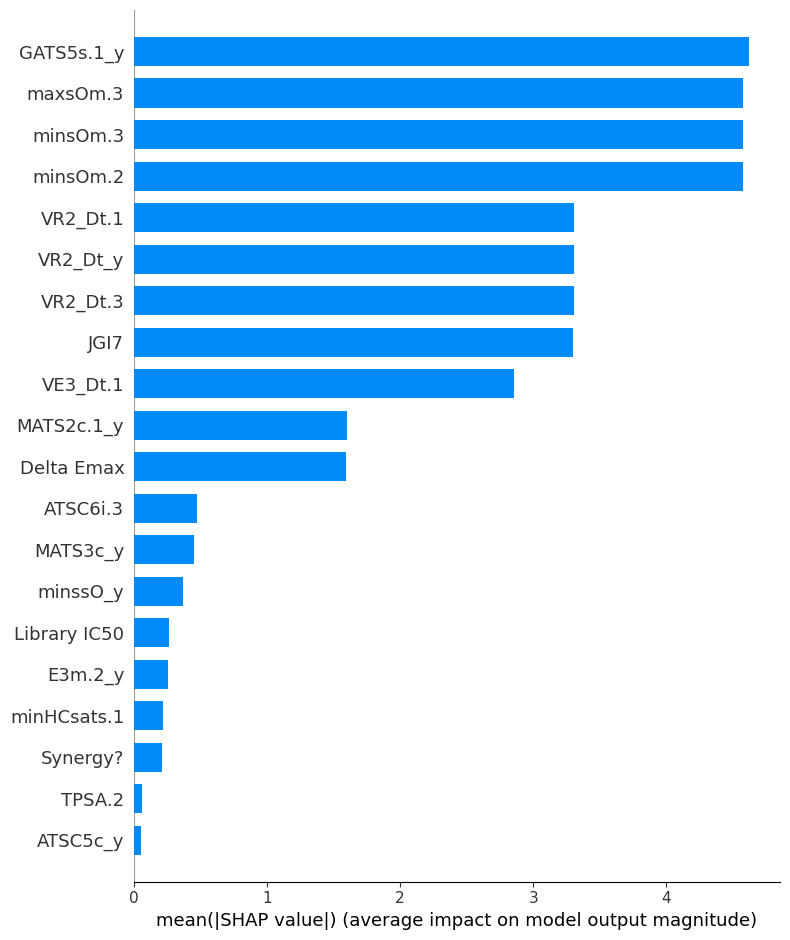

Top 20 Positive Score SHAP Values:
[0.25349965957015297, 0.155143374779324, 0.13176364924725523, 0.12162562328574797, 0.12059662680380388, -0.10752330048902513, 0.10298229548974837, 0.09495359298113086, 0.08219284790009147, 0.07712309456275834, 0.07605347819033001, 0.06755026926248335, -0.05879298704497897, 0.053924787277704604, 0.04920138608672817, -0.04671348932471543, 0.04340211819953584, 0.03942894589259662, 0.03774770534158025, 0.03739213670250149]


In [61]:
# Calculate SHAP values for a specific prediction (e.g., the first test sample)
shap_values = explainer.shap_values(X_test.iloc[0])

# Calculate the absolute SHAP values
abs_shap_values = np.abs(shap_values)

# Sort the absolute SHAP values in descending order to identify the top features
sorted_indices = np.argsort(abs_shap_values)[::-1]

# Separate positive and negative SHAP values
positive_indices = sorted_indices[shap_values > 0]
negative_indices = sorted_indices[shap_values < 0]

# Select the top 20 positive features and their corresponding SHAP values
top_20_positive_indices = positive_indices[:20]
top_20_positive_features = X_test.columns.to_numpy()[top_20_positive_indices]
top_20_positive_shap_values = shap_values[top_20_positive_indices]

# Create a list of top 20 positive score SHAP values
top_20_positive_shap_values_list = top_20_positive_shap_values.tolist()

# Create a DataFrame with only the top 20 positive features for the specific prediction
top_20_positive_features_df = X_test.iloc[0][top_20_positive_features]

# Convert the top 20 positive features DataFrame to a matrix-like format
top_20_positive_features_matrix = top_20_positive_features_df.values.reshape(1, -1)

# Create a summary plot for the top 20 positive score SHAP values
shap.summary_plot(top_20_positive_features_matrix, top_20_positive_features_matrix, plot_type='bar', feature_names=top_20_positive_features, title="Top 20 Positive Score SHAP Values")

# Show the plot
plt.show()

# Print the list of top 20 positive score SHAP values
print("Top 20 Positive Score SHAP Values:")
print(top_20_positive_shap_values_list)

In [68]:
positive_indices

array([  17, 1872, 2139, 1792, 1923,   12, 1765, 1563, 1940, 1920, 1921,
       1589, 1537, 2050, 1544, 1871,   18, 2337, 2353, 1631, 1608, 1771,
       2476, 1937, 1831, 2244, 1621, 1474, 2214, 2051, 2424, 2200, 2495,
       1682, 2359, 2416, 1934, 1407, 1722,  430, 2513, 1967, 2262, 2015,
       1751, 1645, 1484, 1479, 2345, 2391, 2060,  780, 1042, 1913, 1404,
       1961, 2121, 1573, 2058, 1594, 1290, 1421, 1184, 1222,   70, 1546,
       1419, 1733, 2389, 1055, 1569, 2268, 1966, 1403, 2283, 2298, 1331,
       2315, 1903, 1402,  304, 2324, 1584, 1794,   10, 2073, 1927, 2184,
       1737, 1749, 2235, 1971, 2339,  368, 1339,  316,  735, 1503, 2311,
        516, 2111,    6, 1212, 2261,  477, 2413, 1542, 2398, 1989, 2446,
       1748, 2451,  878, 2096, 1999, 1521, 2266, 2447, 1657, 1605, 2290,
       1987, 1519, 1914, 2444,  143, 1877, 2487, 2068,  226, 2125, 2173,
       1011, 2374, 2223, 1259, 1680, 2276, 1658, 2417, 1865, 1424,  448,
       2231,  578, 2486,  668, 1480, 1110, 1958, 12

In [69]:
negative_indices

array([  16,   15, 1702, ...,  733, 1467,  725], dtype=int64)

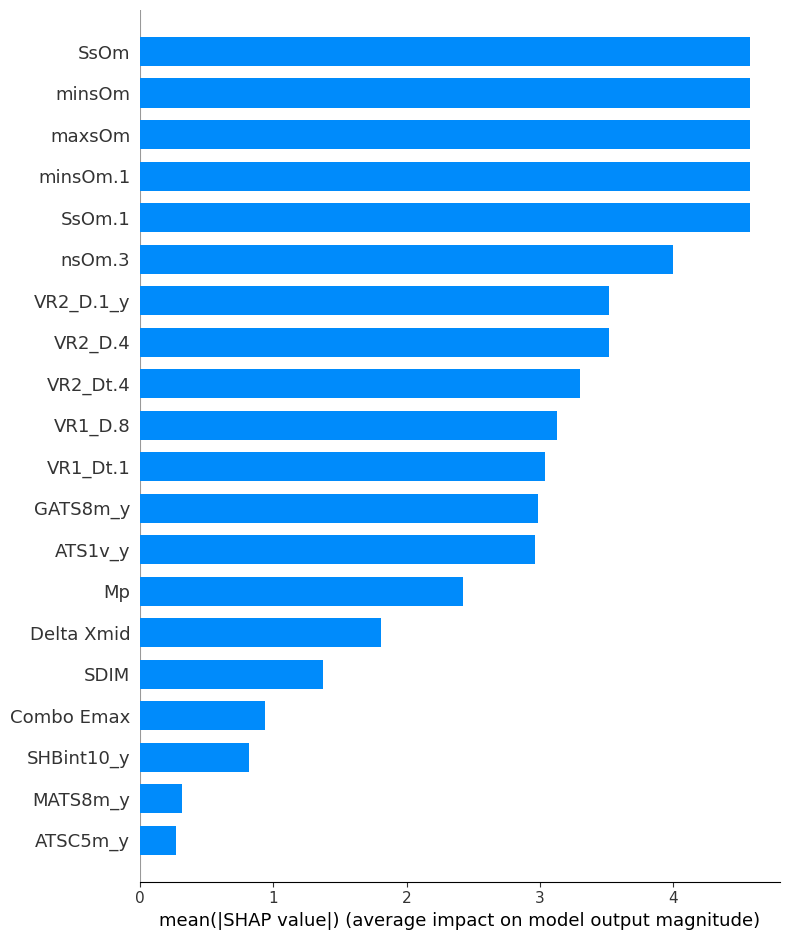

Top 20 Negative Score SHAP Values:
[1.5693306201762174, 0.7325539485709265, 0.2140067311830719, -0.12289961161336276, 0.12079558136277999, 0.11052657774338569, -0.06177266198774123, -0.059576553266325674, -0.04175611132347998, -0.038288338165860455, -0.03769442071521563, 0.03730311307555231, -0.031420799084837574, -0.03125673170172579, 0.030479753023845563, -0.028016356544519942, -0.026627709888373395, -0.025051530377641885, -0.02415537496382128, -0.023409004163859198]


In [64]:

# Select the top 20 positive features and their corresponding SHAP values
top_20_negative_indices = negative_indices[:20]
top_20_negative_features = X_test.columns.to_numpy()[top_20_negative_indices]
top_20_negative_shap_values = shap_values[top_20_negative_indices]

# Create a list of top 20 positive score SHAP values
top_20_negative_shap_values_list = top_20_negative_shap_values.tolist()

# Create a DataFrame with only the top 20 positive features for the specific prediction
top_20_negative_features_df = X_test.iloc[0][top_20_negative_features]

# Convert the top 20 positive features DataFrame to a matrix-like format
top_20_negative_features_matrix = top_20_negative_features_df.values.reshape(1, -1)

# Create a summary plot for the top 20 positive score SHAP values
shap.summary_plot(top_20_negative_features_matrix, top_20_negative_features_matrix, plot_type='bar', feature_names=top_20_negative_features, title="Top 20 Negative Score SHAP Values")

# Show the plot
plt.show()

# Print the list of top 20 positive score SHAP values
print("Top 20 Negative Score SHAP Values:")
print(top_20_negative_shap_values_list)